# 2 PCA / Decision Trees/ Random Forests

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult (1).data


### Implement the decision tree algorithm to classify whether the income of a particular user exceeds $50K per year or not. Divide the data into two sets: Training set (80%) and validation set (20%). Plot the training error and validation error against the number of nodes present in the decision tree. Describe the optimal decision tree in your video.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

df = pd.read_csv("adult.data")  #reading the dataset and storing in df
df.columns = ["age", "workclass", "fnlwgt", "education", "education.num", "marital-status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours-per-week", "native-country", "income"] # Add coloumn names
df

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital.gain,capital.loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
le = LabelEncoder()                         # Change categorical data to numerical data
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])
df['income'] = df['income'].astype('category')
df

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital.gain,capital.loss,hours-per-week,native-country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32560 non-null  int64   
 1   workclass       32560 non-null  int64   
 2   fnlwgt          32560 non-null  int64   
 3   education       32560 non-null  int64   
 4   education.num   32560 non-null  int64   
 5   marital-status  32560 non-null  int64   
 6   occupation      32560 non-null  int64   
 7   relationship    32560 non-null  int64   
 8   race            32560 non-null  int64   
 9   sex             32560 non-null  int64   
 10  capital.gain    32560 non-null  int64   
 11  capital.loss    32560 non-null  int64   
 12  hours-per-week  32560 non-null  int64   
 13  native-country  32560 non-null  int64   
 14  income          32560 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


In [ ]:
train= df.sample(frac=0.8, random_state= 27)   # Divide randomly Training set(80%) and Validation set(20%)
vali=df.drop(train.index)
copy_train = train.copy()
y_train = train['income']
train.drop(['income'], axis=1, inplace=True)

y_vali = vali['income']
vali.drop(['income'], axis=1, inplace=True)

In [ ]:
train       # Train dataset

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital.gain,capital.loss,hours-per-week,native-country
22966,25,4,256620,9,13,5,4,1,4,1,0,0,40,39
3708,41,2,343079,9,13,2,10,5,4,0,0,1740,20,39
7878,51,4,186303,9,13,2,12,0,4,1,0,0,40,39
2453,48,4,207058,11,9,0,1,4,4,0,0,0,37,39
32487,32,4,164190,15,10,4,4,3,4,1,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17921,18,4,118938,1,7,4,12,3,4,1,0,0,18,39
30468,27,6,259873,11,9,2,8,0,2,1,0,0,60,39
4198,18,4,127388,2,8,4,8,1,4,0,0,0,25,39
30493,27,4,150296,11,9,4,8,3,4,0,0,0,32,39


In [ ]:
y_train     # Y of Train

22966    0
3708     0
7878     1
2453     0
32487    0
        ..
17921    0
30468    1
4198     0
30493    0
9442     0
Name: income, Length: 26048, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
vali        # Validation dataset

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital.gain,capital.loss,hours-per-week,native-country
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23
16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39
20,54,4,302146,11,9,5,8,4,2,0,0,0,20,39
23,59,4,109015,11,9,0,13,4,4,0,0,0,40,39
24,56,2,216851,9,13,2,13,0,4,1,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,32,4,116138,12,14,4,13,1,1,1,0,0,11,36
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [ ]:
y_vali      # Y of validation

5        0
16       0
20       0
23       0
24       1
        ..
32552    0
32555    0
32557    0
32558    0
32559    1
Name: income, Length: 6512, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
class addNode:
    def __init__(self, attribute=None, split_value=None, left=None, right=None, label=None):
        self.split_value = split_value
        self.attribute = attribute
        self.label = label
        self.right = right
        self.left = left

    def checkLeafNode(self):
        return self.label is not None

In [ ]:
class DecisionTree:
    
    def __init__(self, max_height=50, minvalues=2, n_attributes=None):
        self.max_height = max_height
        self.minvalues = minvalues
        
        self.n_attributes = n_attributes
        self.root = None

    def predict(self, X):
        return np.array([self.predLabel(X,index, self.root) for index, row in X.iterrows()])

    def predLabel(self,data, x, node):
        if node.checkLeafNode():
            return node.label

        if (data.loc[x][node.attribute] > (node.split_value)):
            return self.predLabel(data,x, node.right)
        return self.predLabel(data,x, node.left)

    def error(self,y, y_pred):
      y = np.array(y)
      err = np.sum((y - y_pred)**2) / len(y)
      return err

    def calc_entropy(self,y):
      counts = np.bincount(y)
      ratios = counts / len(y)
      return -np.sum([prob * np.log2(prob) for prob in ratios if prob > 0])

    def fit(self, X, y):
      if not self.n_attributes:
        self.n_attributes = X.shape[1]
      else:
        min(self.n_attributes, X.shape[1])
      self.root = self.ID3(X, y)

    

    def ID3(self, X, y, height=0):
        global count_nodes
        classes = len(np.unique(y))
        n_samples, n_attributes = X.shape
        
        if (classes == 1 or n_samples < self.minvalues or height >= self.max_height):         # Check if it's a pure node
            label_v = self.findLabel(y)
            count_nodes = count_nodes + 1 
            return addNode(label=label_v)

        att_indices = np.random.choice(n_attributes, self.n_attributes, replace=False)
       

      
        best_attribute, best_splitValue = self.findAttribute(X, y, att_indices)                        # Find best Attribute to split

        
        left_split, right_split = self.seperate(X.iloc[:, best_attribute], best_splitValue)
        right_subtree = self.ID3(X.iloc[right_split, :], y.iloc[right_split], height + 1)
        left_subtree = self.ID3(X.iloc[left_split, :], y.iloc[left_split], height + 1)
        count_nodes = count_nodes + 1 
        return addNode(best_attribute, best_splitValue, left_subtree, right_subtree)

    def findLabel(self, y):
        find = Counter(y)
        l = find.most_common(1)[0][0]
        
        return l


    def findAttribute(self, X, y, att_indices):
        
        split_att, split_v = None, None
        info_gain = -1
        for index in att_indices:
            X_column = X.iloc[:, index]
            values = np.unique(X_column)
            for split_value in values:
                curr_gain = self.informationGain(y, X_column, split_value)

                if(info_gain < curr_gain):
                  split_v = split_value
                  info_gain = curr_gain                                       # Find attribue that returns max information gain
                  split_att = index
                   

        return split_att, split_v

    def seperate(self, X_column, split_value):
      right_split = np.argwhere(X_column.to_numpy() > split_value).flatten()
      left_split = np.argwhere(X_column.to_numpy() <= split_value).flatten()
        
      return left_split, right_split

    def informationGain(self, y, X_column, split_value):
        
        left_split, right_split = self.seperate(X_column, split_value)

        if len(left_split) == 0 or len(right_split) == 0:
            return 0
        system_entropy = self.calc_entropy(y)                              # Sytem Entropy

        count_left, count_right = len(left_split), len(right_split)
        samples_count = len(y)
        
        entropy_left, entropy_right = self.calc_entropy(y.iloc[left_split]), self.calc_entropy(y.iloc[right_split])
        attribute_entropy = (count_right / samples_count) * entropy_right + (count_left / samples_count) * entropy_left

        
        return (system_entropy - attribute_entropy)






    

In [ ]:
nodes_count = []
training_error = []
validation_error = []
for i in range(10):
  count_nodes = 0
  model = DecisionTree(max_height=i)
  model.fit(train, y_train)
  nodes_count.append(count_nodes)
  y_pred_train = model.predict(train)
  err_train = model.error(y_train, y_pred_train)
  training_error.append(err_train)
  y_pred_vali = model.predict(vali)
  err_vali = model.error(y_vali, y_pred_vali)
  validation_error.append(err_vali)



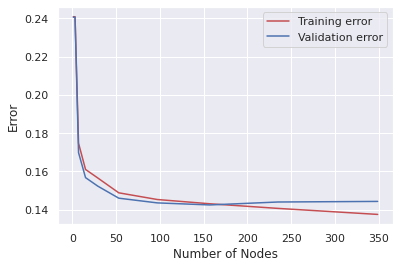

In [ ]:
  
plt.plot(nodes_count, training_error,c ='r', label ='Training error')
plt.plot(nodes_count, validation_error,c ='b', label ='Validation error')
plt.xlabel("Number of Nodes")
plt.ylabel("Error")
plt.legend()

plt.show()

**OBSERVATIONS:**

*   As we can see the plot for Training error and Validation Error with respect to number of nodes.
*   As number of nodes keep increasing the training error keeps on decreasing.
*   But the Validation Error becomes constant after some number of nodes.
*   Optimal Decision Tree can have the number of nodes where the Validation Error becomes constant and there is an intersection of Training error and Validation Error.
*   This can be called as the sweet spot.
*   This happens when the number of nodes are between 150 and 200. We get these number of nodes when the max height of the tree is 7. So, the optimal Decison Tree can have the max height as 7.







In [ ]:
print(nodes_count)
print(validation_error)
print(training_error)

[1, 3, 7, 15, 29, 53, 97, 157, 235, 349]
[0.24063267813267813, 0.24063267813267813, 0.16984029484029484, 0.15678746928746928, 0.15233415233415235, 0.14603808353808354, 0.14358108108108109, 0.14250614250614252, 0.14404176904176905, 0.14434889434889434]
[0.2408630221130221, 0.2408630221130221, 0.17475429975429976, 0.16104883292383293, 0.15659551597051596, 0.14884060196560198, 0.1453470515970516, 0.14312039312039312, 0.14070178132678132, 0.13755374692874692]


In [ ]:
print("Most Optimal Error : ")
print(validation_error[7])

Most Optimal Error : 
0.14250614250614252


### Create 10 datasets using bootstrap technique and rerun the part 1 to find the optimal decision tree for each of these datasets. Report the final error by taking the average of each decision tree and report your findings. Did the performance improved?

In [ ]:
class Bootstrap:
  def createDataset(self,X):
    errors = []
    for i in range(10):
      # Repeat 10 times
      data= X.sample(frac=0.8)  #Create a random dataset
      y_data = data['income']
      data.drop(['income'], axis=1, inplace=True)
      model = DecisionTree(max_height=7)
      model.fit(data, y_data)
      y_pred = model.predict(vali)
      err = model.error(y_vali, y_pred)
      errors.append(err)

    avg_error = sum(errors)/len(errors)
    return avg_error

In [ ]:
modelB = Bootstrap()
error = modelB.createDataset(copy_train)
print(error)

0.14316646191646193


**OBSERVATION:**

*   We get the average error obtained from Bootstrap technique.
*   This average error obtained is very close to the error obtained in the most optimal decision tree in the first part.



### Implement PCA to find optimal number of features. Plot the error of optimal decision tree against the number of features. How many features did it require to match the performance of the tree obtained in the first part.

In [ ]:
def PCA(data , n_reduce):
    mean_values = data - np.mean(data , axis = 0)     # Subtract each feature by their mean
    E = np.cov(mean_values , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(E)    # Find Eigenvalues and Eigenvectors
    descend = np.argsort(eigenvalues)[::-1]
    eigenvector = eigenvectors[:,descend]
    eigenvalue = eigenvalues[descend]
    features = eigenvector[:,0:n_reduce]              # Reduce number of features
    reduced_features = np.dot(features.transpose() , mean_values.transpose() ).transpose()
     
    return reduced_features

In [ ]:
f=[]
err_f=[]
features = PCA(train , 1)
 
pca_features = pd.DataFrame(features , columns = ['X1'])
print(pca_features)

                  X1
0      -66687.582864
1     -153146.507244
2        3629.416350
3      -17125.583374
4       25742.415825
...              ...
26043   70994.414942
26044  -69940.582759
26045   62544.415085
26046   39636.415545
26047   20260.415965

[26048 rows x 1 columns]


In [ ]:
count_nodes = 0
model = DecisionTree(max_height=7)
model.fit(pca_features, y_train)
y_pred = model.predict(pca_features)
err = model.error(y_train, y_pred)
print("Error for 1 features")
print(err)
f.append(1)
err_f.append(err)

Error for 1 features
0.2388667076167076


In [ ]:

features = PCA(train , 2)
 
pca_features = pd.DataFrame(features , columns = ['X1','X2'])
print(pca_features)

                  X1           X2
0      -66687.582864  1100.837079
1     -153146.507244  1118.307045
2        3629.416350  1089.046652
3      -17125.583374  1092.526779
4       25742.415825  1085.342839
...              ...          ...
26043   70994.414942  1077.762617
26044  -69940.582759  1101.379500
26045   62544.415085  1079.178089
26046   39636.415545  1083.015677
26047   20260.415965  1086.260962

[26048 rows x 2 columns]


In [ ]:
count_nodes = 0
model = DecisionTree(max_height=7)
model.fit(pca_features, y_train)
y_pred = model.predict(pca_features)
err = model.error(y_train, y_pred)
print("Error for 2 features")
print(err)
f.append(2)
err_f.append(err)

Error for 2 features
0.1904176904176904


In [ ]:
features = PCA(train , 3)
 
pca_features = pd.DataFrame(features , columns = ['X1','X2','X3'])
print(pca_features)

                  X1           X2           X3
0      -66687.582864  1100.837079   -86.757455
1     -153146.507244  1118.307045  1656.894560
2        3629.416350  1089.046652   -89.683751
3      -17125.583374  1092.526779   -88.820207
4       25742.415825  1085.342839   -90.661391
...              ...          ...          ...
26043   70994.414942  1077.762617   -92.647344
26044  -69940.582759  1101.379500   -86.580968
26045   62544.415085  1079.178089   -92.276755
26046   39636.415545  1083.015677   -91.274417
26047   20260.415965  1086.260962   -90.417503

[26048 rows x 3 columns]


In [ ]:
count_nodes = 0
model = DecisionTree(max_height=7)
model.fit(pca_features, y_train)
y_pred = model.predict(pca_features)
err = model.error(y_train, y_pred)
print("Error for 3 features")
print(err)
f.append(3)
err_f.append(err)

Error for 3 features
0.1727195945945946


In [ ]:
features = PCA(train , 4)
 
pca_features = pd.DataFrame(features , columns = ['X1','X2','X3','X4'])
print(pca_features)

                  X1           X2           X3         X4
0      -66687.582864  1100.837079   -86.757455 -12.158491
1     -153146.507244  1118.307045  1656.894560  -5.544528
2        3629.416350  1089.046652   -89.683751  12.218743
3      -17125.583374  1092.526779   -88.820207   8.626502
4       25742.415825  1085.342839   -90.661391  -6.469550
...              ...          ...          ...        ...
26043   70994.414942  1077.762617   -92.647344 -26.395726
26044  -69940.582759  1101.379500   -86.580968  -4.669789
26045   62544.415085  1079.178089   -92.276755 -24.321043
26046   39636.415545  1083.015677   -91.274417 -13.609078
26047   20260.415965  1086.260962   -90.417503  -0.474092

[26048 rows x 4 columns]


In [ ]:
count_nodes = 0
model = DecisionTree(max_height=7)
model.fit(pca_features, y_train)
y_pred = model.predict(pca_features)
err = model.error(y_train, y_pred)
print("Error for 4 features")
print(err)
f.append(4)
err_f.append(err)

Error for 4 features
0.17682739557739557


Text(0.5, 1.0, 'PCA')

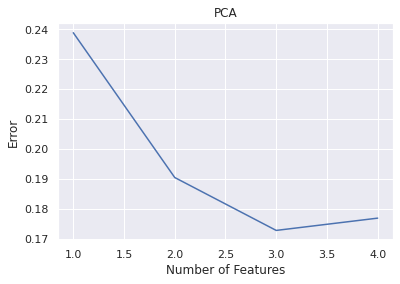

In [ ]:
plt.plot(f, err_f)
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('PCA')

**OBSERVATIONS:**

*   We have implemented PCA to find optimal number of features.
*   We have plotted the graph of error of optimal decision Tree.
*   We can see when number of features = 3 we get least error.
*   So, it required 3 features to match the performance of the tree obtained in the first part.



